Audio File pre-processing and converting to images

In [1]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
# all emotions on RAVDESS dataset
int2emotion = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

# we allow only these emotions
AVAILABLE_EMOTIONS = {
    "angry",
    "sad",
    "neutral",
    "happy"
}


In [2]:
def extract_feature(file_name, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [3]:
def load_data(test_size=0.2):
    X, y = [], []
    try :
      for file in glob.glob("data/ravdess/Actor_*/*.wav"):
          # get the base name of the audio file
          basename = os.path.basename(file)
          print(basename)
          # get the emotion label
          emotion = int2emotion[basename.split("-")[2]]
          # we allow only AVAILABLE_EMOTIONS we set
          if emotion not in AVAILABLE_EMOTIONS:
              continue
          # extract speech features
          features = extract_feature(file, mfcc=True, chroma=True, mel=True)
          # add to data
          X.append(features)
          l={'happy':0.0,'sad':1.0,'neutral':3.0,'angry':4.0}
          y.append(l[emotion])
    except :
         pass
    # split the data to training and testing and return it
    return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [4]:
X_train, X_test, y_train, y_test = load_data(test_size=0.25)

print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", X_test.shape[0])

03-01-01-01-01-01-01.wav
03-01-01-01-01-02-01.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-01-01.wav
03-01-01-01-02-02-01.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-01.wav
03-01-02-01-01-02-01.wav
03-01-02-01-02-01-01.wav
03-01-02-01-02-02-01.wav
03-01-02-02-01-01-01.wav
03-01-02-02-01-02-01.wav
03-01-02-02-02-01-01.wav
03-01-02-02-02-02-01.wav
03-01-03-01-01-01-01.wav
03-01-03-01-01-02-01.wav
03-01-03-01-02-01-01.wav
03-01-03-01-02-02-01.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-01.wav
03-01-03-02-01-02-01.wav
03-01-03-02-02-01-01.wav
03-01-03-02-02-02-01.wav
03-01-04-01-01-01-01.wav
03-01-04-01-01-02-01.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-01-01.wav
03-01-04-01-02-02-01.wav
03-01-04-02-01-01-01.wav
03-01-04-02-01-02-01.wav
03-01-04-02-02-01-01.wav
03-01-04-02-02-02-01.wav
03-01-05-01-01-01-01.wav
03-01-05-01-01-02-01.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-01.wav
03-01-05-01-02-02-01.wav
03-01-05-02-01-01-01.wav
03-01-05-02-01-02-01.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00082397 -0.0005188  -0.00054932 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00067139  0.00253296  0.00317383 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-01.wav
03-01-05-02-02-02-01.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 4.2724609e-04  6.1035156e-04  1.3427734e-03 ... -2.4414062e-04
 -2.7465820e-04  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00036621 0.00033569 0.00027466 ... 0.0005188  0.00057983 0.00076294] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-06-01-01-01-01.wav
03-01-06-01-01-02-01.wav
03-01-06-01-02-01-01.wav
03-01-06-01-02-02-01.wav
03-01-06-02-01-01-01.wav
03-01-06-02-01-02-01.wav
03-01-06-02-02-01-01.wav
03-01-06-02-02-02-01.wav
03-01-07-01-01-01-01.wav
03-01-07-01-01-02-01.wav
03-01-07-01-02-01-01.wav
03-01-07-01-02-02-01.wav
03-01-07-02-01-01-01.wav
03-01-07-02-01-02-01.wav
03-01-07-02-02-01-01.wav
03-01-07-02-02-02-01.wav
03-01-08-01-01-01-01.wav
03-01-08-01-01-02-01.wav
03-01-08-01-02-01-01.wav
03-01-08-01-02-02-01.wav
03-01-08-02-01-01-01.wav
03-01-08-02-01-02-01.wav
03-01-08-02-02-01-01.wav
03-01-08-02-02-02-01.wav
03-01-01-01-01-01-02.wav
03-01-01-01-01-02-02.wav
03-01-01-01-02-01-02.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-02-02.wav
03-01-02-01-01-01-02.wav
03-01-02-01-01-02-02.wav
03-01-02-01-02-01-02.wav
03-01-02-01-02-02-02.wav
03-01-02-02-01-01-02.wav
03-01-02-02-01-02-02.wav
03-01-02-02-02-01-02.wav
03-01-02-02-02-02-02.wav
03-01-03-01-01-01-02.wav
03-01-03-01-01-02-02.wav
03-01-03-01-02-01-02.wav
03-01-03-01-02-02-02.wav
03-01-03-02-01-01-02.wav
03-01-03-02-01-02-02.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-03-02-02-01-02.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-02.wav
03-01-04-01-01-01-02.wav
03-01-04-01-01-02-02.wav
03-01-04-01-02-01-02.wav
03-01-04-01-02-02-02.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-02.wav
03-01-04-02-01-02-02.wav
03-01-04-02-02-01-02.wav
03-01-04-02-02-02-02.wav
03-01-05-01-01-01-02.wav
03-01-05-01-01-02-02.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-02.wav
03-01-05-01-02-02-02.wav
03-01-05-02-01-01-02.wav
03-01-05-02-01-02-02.wav
03-01-05-02-02-01-02.wav
03-01-05-02-02-02-02.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-02.wav
03-01-06-01-01-02-02.wav
03-01-06-01-02-01-02.wav
03-01-06-01-02-02-02.wav
03-01-06-02-01-01-02.wav
03-01-06-02-01-02-02.wav
03-01-06-02-02-01-02.wav
03-01-06-02-02-02-02.wav
03-01-07-01-01-01-02.wav
03-01-07-01-01-02-02.wav
03-01-07-01-02-01-02.wav
03-01-07-01-02-02-02.wav
03-01-07-02-01-01-02.wav
03-01-07-02-01-02-02.wav
03-01-07-02-02-01-02.wav
03-01-07-02-02-02-02.wav
03-01-08-01-01-01-02.wav
03-01-08-01-01-02-02.wav
03-01-08-01-02-01-02.wav
03-01-08-01-02-02-02.wav
03-01-08-02-01-01-02.wav
03-01-08-02-01-02-02.wav
03-01-08-02-02-01-02.wav
03-01-08-02-02-02-02.wav
03-01-01-01-01-01-03.wav
03-01-01-01-01-02-03.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-01-01-02-01-03.wav
03-01-01-01-02-02-03.wav
03-01-02-01-01-01-03.wav
03-01-02-01-01-02-03.wav
03-01-02-01-02-01-03.wav
03-01-02-01-02-02-03.wav
03-01-02-02-01-01-03.wav
03-01-02-02-01-02-03.wav
03-01-02-02-02-01-03.wav
03-01-02-02-02-02-03.wav
03-01-03-01-01-01-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.00018311 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 9.1552734e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-01-02-03.wav
03-01-03-01-02-01-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 4.5776367e-04  6.7138672e-04  6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-03.wav
03-01-03-02-01-01-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[2.1362305e-04 1.5258789e-04 6.1035156e-05 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00027466 -0.00024414 -0.00027466 ... -0.00018311 -0.00024414
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-03.wav
03-01-03-02-02-02-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0007019  -0.00015259 -0.00100708 ...  0.00033569  0.00036621
  0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00015259 -0.00018311
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-03.wav
03-01-04-01-01-02-03.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-04-01-02-01-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00036621 -0.00033569
 -0.00033569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  2.4414062e-04
  2.4414062e-04  2.4414062e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-03.wav
03-01-04-02-01-01-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -6.1035156e-05
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-02-03.wav
03-01-04-02-02-01-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.7138672e-04 -7.0190430e-04 -7.0190430e-04 ...  0.0000000e+00
  6.1035156e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -1.0894775e-02
 -9.8571777e-03 -1.3732910e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00247192 0.00244141 0.00244141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-03.wav
03-01-05-01-01-01-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -1.5258789e-04  0.0000000e+00 ...  1.2207031e-04
  1.2207031e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-03.wav
03-01-05-01-02-01-03.wav
03-01-05-01-02-02-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 1.5258789e-04
 2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ... -6.0729980e-03
 -6.0729980e-03 -6.0729980e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-03.wav
03-01-05-02-01-02-03.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00021362 -0.00027466  0.00012207 ... -0.00015259 -0.00015259
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00067139  0.00057983  0.00045776 ... -0.00180054 -0.0022583
 -0.00146484] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-05-02-02-01-03.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[9.1552734e-05 0.0000000e+00 1.8310547e-04 ... 1.8310547e-04 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 7.3242188e-04 7.6293945e-04
 1.0986328e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-03.wav
03-01-06-01-01-01-03.wav
03-01-06-01-01-02-03.wav
03-01-06-01-02-01-03.wav
03-01-06-01-02-02-03.wav
03-01-06-02-01-01-03.wav
03-01-06-02-01-02-03.wav
03-01-06-02-02-01-03.wav
03-01-06-02-02-02-03.wav
03-01-07-01-01-01-03.wav
03-01-07-01-01-02-03.wav
03-01-07-01-02-01-03.wav
03-01-07-01-02-02-03.wav
03-01-07-02-01-01-03.wav
03-01-07-02-01-02-03.wav
03-01-07-02-02-01-03.wav
03-01-07-02-02-02-03.wav
03-01-08-01-01-01-03.wav
03-01-08-01-01-02-03.wav
03-01-08-01-02-01-03.wav
03-01-08-01-02-02-03.wav
03-01-08-02-01-01-03.wav
03-01-08-02-01-02-03.wav
03-01-08-02-02-01-03.wav
03-01-08-02-02-02-03.wav
03-01-01-01-01-01-04.wav
03-01-01-01-01-02-04.wav
03-01-01-01-02-01-04.wav
03-01-01-01-02-02-04.wav
03-01-02-01-01-01-04.wav
03-01-02-01-01-02-04.wav
03-01-02-01-02-01-04.wav
03-01-02-01-02-02-04.wav
03-01-02-02-01-01-04.wav
03-01-02-02-01-02-04.wav
03-01-02-02-02-01-04.wav
03-01-02-02-02-02-04.wav
03-01-03-01-01-01-04.wav
03-01-03-01-01-02-04.wav
03-01-03-01-02-01-04.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-04.wav
03-01-03-02-02-02-04.wav
03-01-04-01-01-01-04.wav
03-01-04-01-01-02-04.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-01-04.wav
03-01-04-01-02-02-04.wav
03-01-04-02-01-01-04.wav
03-01-04-02-01-02-04.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00012207 -0.00012207 -0.00012207 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-04.wav
03-01-04-02-02-02-04.wav
03-01-05-01-01-01-04.wav
03-01-05-01-01-02-04.wav
03-01-05-01-02-01-04.wav
03-01-05-01-02-02-04.wav
03-01-05-02-01-01-04.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-02-04.wav
03-01-05-02-02-01-04.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-04.wav
03-01-06-01-01-01-04.wav
03-01-06-01-01-02-04.wav
03-01-06-01-02-01-04.wav
03-01-06-01-02-02-04.wav
03-01-06-02-01-01-04.wav
03-01-06-02-01-02-04.wav
03-01-06-02-02-01-04.wav
03-01-06-02-02-02-04.wav
03-01-07-01-01-01-04.wav
03-01-07-01-01-02-04.wav
03-01-07-01-02-01-04.wav
03-01-07-01-02-02-04.wav
03-01-07-02-01-01-04.wav
03-01-07-02-01-02-04.wav
03-01-07-02-02-01-04.wav
03-01-07-02-02-02-04.wav
03-01-08-01-01-01-04.wav
03-01-08-01-01-02-04.wav
03-01-08-01-02-01-04.wav
03-01-08-01-02-02-04.wav
03-01-08-02-01-01-04.wav
03-01-08-02-01-02-04.wav
03-01-08-02-02-01-04.wav
03-01-08-02-02-02-04.wav
03-01-01-01-01-01-05.wav
03-01-01-01-01-02-05.wav
03-01-01-01-02-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-02-05.wav
03-01-02-01-01-01-05.wav
03-01-02-01-01-02-05.wav
03-01-02-01-02-01-05.wav
03-01-02-01-02-02-05.wav
03-01-02-02-01-01-05.wav
03-01-02-02-01-02-05.wav
03-01-02-02-02-01-05.wav
03-01-02-02-02-02-05.wav
03-01-03-01-01-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-01-02-05.wav
03-01-03-01-02-01-05.wav
03-01-03-01-02-02-05.wav
03-01-03-02-01-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-05.wav
03-01-03-02-02-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-05.wav
03-01-04-01-01-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -6.1035156e-05 -6.1035156e-05 ...  6.1035156e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 3.0517578e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-02-05.wav
03-01-04-01-02-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-05.wav
03-01-04-02-01-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 6.1035156e-05 ... 0.0000000e+00 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-02-05.wav
03-01-04-02-02-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00057983 0.00054932 0.00057983 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-05.wav
03-01-05-01-01-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-05.wav
03-01-05-01-02-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-02-05.wav
03-01-05-02-01-01-05.wav
03-01-05-02-01-02-05.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -6.1035156e-05 ...  3.9672852e-04
  4.2724609e-04  4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-05-02-02-01-05.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-05.wav
03-01-06-01-01-01-05.wav
03-01-06-01-01-02-05.wav
03-01-06-01-02-01-05.wav
03-01-06-01-02-02-05.wav
03-01-06-02-01-01-05.wav
03-01-06-02-01-02-05.wav
03-01-06-02-02-01-05.wav
03-01-06-02-02-02-05.wav
03-01-07-01-01-01-05.wav
03-01-07-01-01-02-05.wav
03-01-07-01-02-01-05.wav
03-01-07-01-02-02-05.wav
03-01-07-02-01-01-05.wav
03-01-07-02-01-02-05.wav
03-01-07-02-02-01-05.wav
03-01-07-02-02-02-05.wav
03-01-08-01-01-01-05.wav
03-01-08-01-01-02-05.wav
03-01-08-01-02-01-05.wav
03-01-08-01-02-02-05.wav
03-01-08-02-01-01-05.wav
03-01-08-02-01-02-05.wav
03-01-08-02-02-01-05.wav
03-01-08-02-02-02-05.wav
03-01-01-01-01-01-06.wav
03-01-01-01-01-02-06.wav
03-01-01-01-02-01-06.wav
03-01-01-01-02-02-06.wav
03-01-02-01-01-01-06.wav
03-01-02-01-01-02-06.wav
03-01-02-01-02-01-06.wav
03-01-02-01-02-02-06.wav
03-01-02-02-01-01-06.wav
03-01-02-02-01-02-06.wav
03-01-02-02-02-01-06.wav
03-01-02-02-02-02-06.wav
03-01-03-01-01-01-06.wav
03-01-03-01-01-02-06.wav
03-01-03-01-02-01-06.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  3.0517578e-05 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  1.5258789e-04
  2.1362305e-04  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-06.wav
03-01-03-02-01-02-06.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-06.wav
03-01-03-02-02-02-06.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 6.4086914e-04 5.1879883e-04
 5.4931641e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-06.wav
03-01-04-01-01-02-06.wav
03-01-04-01-02-01-06.wav
03-01-04-01-02-02-06.wav
03-01-04-02-01-01-06.wav
03-01-04-02-01-02-06.wav
03-01-04-02-02-01-06.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 2.4414062e-04  2.4414062e-04  2.1362305e-04 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-06.wav
03-01-05-01-01-01-06.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-06.wav
03-01-05-01-02-01-06.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00015259 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-02-06.wav
03-01-05-02-01-01-06.wav
03-01-05-02-01-02-06.wav
03-01-05-02-02-01-06.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 1.0681152e-03  8.2397461e-04  5.4931641e-04 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-06.wav
03-01-06-01-01-01-06.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[1.8310547e-04 6.1035156e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-06-01-01-02-06.wav
03-01-06-01-02-01-06.wav
03-01-06-01-02-02-06.wav
03-01-06-02-01-01-06.wav
03-01-06-02-01-02-06.wav
03-01-06-02-02-01-06.wav
03-01-06-02-02-02-06.wav
03-01-07-01-01-01-06.wav
03-01-07-01-01-02-06.wav
03-01-07-01-02-01-06.wav
03-01-07-01-02-02-06.wav
03-01-07-02-01-01-06.wav
03-01-07-02-01-02-06.wav
03-01-07-02-02-01-06.wav
03-01-07-02-02-02-06.wav
03-01-08-01-01-01-06.wav
03-01-08-01-01-02-06.wav
03-01-08-01-02-01-06.wav
03-01-08-01-02-02-06.wav
03-01-08-02-01-01-06.wav
03-01-08-02-01-02-06.wav
03-01-08-02-02-01-06.wav
03-01-08-02-02-02-06.wav
03-01-01-01-01-01-07.wav
03-01-01-01-01-02-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.         -0.00021362 -0.00042725 ... -0.00024414 -0.00027466
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -1.2207031e-04 ...  3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-01-07.wav
03-01-01-01-02-02-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  9.1552734e-05  3.0517578e-05 ... -6.1035156e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-07.wav
03-01-02-01-01-02-07.wav
03-01-02-01-02-01-07.wav
03-01-02-01-02-02-07.wav
03-01-02-02-01-01-07.wav
03-01-02-02-01-02-07.wav
03-01-02-02-02-01-07.wav
03-01-02-02-02-02-07.wav
03-01-03-01-01-01-07.wav
03-01-03-01-01-02-07.wav
03-01-03-01-02-01-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ...  3.0517578e-04
  3.0517578e-04  3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-07.wav
03-01-03-02-01-01-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  6.1035156e-05
  6.1035156e-05  1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 3.9672852e-04 6.4086914e-04 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-07.wav
03-01-03-02-02-01-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -4.5776367e-04
 -4.2724609e-04 -3.9672852e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-07.wav
03-01-04-01-01-01-07.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 6.1035156e-05 2.1362305e-04 ... 1.8310547e-04 1.5258789e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-04-01-01-02-07.wav
03-01-04-01-02-01-07.wav
03-01-04-01-02-02-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -9.1552734e-05 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-07.wav
03-01-04-02-01-02-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -3.0517578e-05 ...  1.0681152e-03
  1.1291504e-03  1.0375977e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00030518  0.0005188   0.00036621 ... -0.00384521 -0.00387573
 -0.00393677] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-07.wav
03-01-05-01-01-01-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -8.2397461e-04
 -7.9345703e-04 -8.2397461e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  9.1552734e-05 ... -2.1667480e-03
 -2.1667480e-03 -2.1972656e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-07.wav
03-01-05-01-02-01-07.wav
03-01-05-01-02-02-07.wav
03-01-05-02-01-01-07.wav
03-01-05-02-01-02-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00061035 -0.00064087 -0.00061035 ...  0.00231934  0.00228882
  0.0022583 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00012207  0.00012207  0.00012207 ... -0.00210571 -0.00201416
 -0.00201416] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-07.wav
03-01-05-02-02-02-07.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -3.6621094e-04
 -3.0517578e-04 -3.0517578e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00012207 -0.00018311 -0.00015259 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-07.wav
03-01-06-01-01-02-07.wav
03-01-06-01-02-01-07.wav
03-01-06-01-02-02-07.wav
03-01-06-02-01-01-07.wav
03-01-06-02-01-02-07.wav
03-01-06-02-02-01-07.wav
03-01-06-02-02-02-07.wav
03-01-07-01-01-01-07.wav
03-01-07-01-01-02-07.wav
03-01-07-01-02-01-07.wav
03-01-07-01-02-02-07.wav
03-01-07-02-01-01-07.wav
03-01-07-02-01-02-07.wav
03-01-07-02-02-01-07.wav
03-01-07-02-02-02-07.wav
03-01-08-01-01-01-07.wav
03-01-08-01-01-02-07.wav
03-01-08-01-02-01-07.wav
03-01-08-01-02-02-07.wav
03-01-08-02-01-01-07.wav
03-01-08-02-01-02-07.wav
03-01-08-02-02-01-07.wav
03-01-08-02-02-02-07.wav
03-01-01-01-01-01-08.wav
03-01-01-01-01-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[1.2207031e-04 9.1552734e-05 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-01-08.wav
03-01-01-01-02-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00018311 0.00018311 0.00021362 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-08.wav
03-01-02-01-01-02-08.wav
03-01-02-01-02-01-08.wav
03-01-02-01-02-02-08.wav
03-01-02-02-01-01-08.wav
03-01-02-02-01-02-08.wav
03-01-02-02-02-01-08.wav
03-01-02-02-02-02-08.wav
03-01-03-01-01-01-08.wav
03-01-03-01-01-02-08.wav
03-01-03-01-02-01-08.wav
03-01-03-01-02-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  6.1035156e-05 ... -1.5258789e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-08.wav
03-01-03-02-01-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ...  0.0000000e+00
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-08.wav
03-01-03-02-02-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  6.1035156e-05 ... -3.6621094e-04
 -3.6621094e-04 -3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -1.2207031e-04
 -1.2207031e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-08.wav
03-01-04-01-01-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[2.1362305e-04 2.4414062e-04 2.7465820e-04 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-01-08.wav
03-01-04-01-02-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -1.2207031e-04 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00012207 0.00012207 0.00015259 ... 0.00018311 0.00018311 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-08.wav
03-01-04-02-01-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 2.1362305e-04  1.8310547e-04  2.1362305e-04 ...  0.0000000e+00
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00076294 0.00079346 0.00079346] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-08.wav
03-01-04-02-02-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 6.1035156e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00231934 0.00228882 0.00222778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-08.wav
03-01-05-01-01-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  2.1362305e-04
  4.2724609e-04  5.7983398e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -2.6245117e-03
 -2.1667480e-03 -2.3803711e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-08.wav
03-01-05-01-02-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -9.1552734e-05 ...  1.8310547e-04
  2.1362305e-04  1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00018311 -0.00018311 -0.00021362 ...  0.00021362  0.00021362
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-08.wav
03-01-05-02-01-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00018311  0.00018311  0.00015259 ... -0.00015259 -0.00015259
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[1.5258789e-04 9.1552734e-05 1.2207031e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-08.wav
03-01-05-02-02-02-08.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[1.8310547e-04 1.5258789e-04 2.1362305e-04 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 8.8500977e-04  8.5449219e-04  8.5449219e-04 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-08.wav
03-01-06-01-01-02-08.wav
03-01-06-01-02-01-08.wav
03-01-06-01-02-02-08.wav
03-01-06-02-01-01-08.wav
03-01-06-02-01-02-08.wav
03-01-06-02-02-01-08.wav
03-01-06-02-02-02-08.wav
03-01-07-01-01-01-08.wav
03-01-07-01-01-02-08.wav
03-01-07-01-02-01-08.wav
03-01-07-01-02-02-08.wav
03-01-07-02-01-01-08.wav
03-01-07-02-01-02-08.wav
03-01-07-02-02-01-08.wav
03-01-07-02-02-02-08.wav
03-01-08-01-01-01-08.wav
03-01-08-01-01-02-08.wav
03-01-08-01-02-01-08.wav
03-01-08-01-02-02-08.wav
03-01-08-02-01-01-08.wav
03-01-08-02-01-02-08.wav
03-01-08-02-02-01-08.wav
03-01-08-02-02-02-08.wav
03-01-01-01-01-01-09.wav
03-01-01-01-01-02-09.wav
03-01-01-01-02-01-09.wav
03-01-01-01-02-02-09.wav
03-01-02-01-01-01-09.wav
03-01-02-01-01-02-09.wav
03-01-02-01-02-01-09.wav
03-01-02-01-02-02-09.wav
03-01-02-02-01-01-09.wav
03-01-02-02-01-02-09.wav
03-01-02-02-02-01-09.wav
03-01-02-02-02-02-09.wav
03-01-03-01-01-01-09.wav
03-01-03-01-01-02-09.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 9.1552734e-05  1.2207031e-04  9.1552734e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-01-09.wav
03-01-03-01-02-02-09.wav
03-01-03-02-01-01-09.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00067139 0.0007019  0.00067139 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-09.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ... -9.1552734e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-09.wav
03-01-03-02-02-02-09.wav
03-01-04-01-01-01-09.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-1.2207031e-04 -3.0517578e-05  0.0000000e+00 ... -9.1552734e-05
  0.0000000e+00 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-02-09.wav
03-01-04-01-02-01-09.wav
03-01-04-01-02-02-09.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-09.wav
03-01-04-02-01-02-09.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-09.wav
03-01-04-02-02-02-09.wav
03-01-05-01-01-01-09.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-09.wav
03-01-05-01-02-01-09.wav
03-01-05-01-02-02-09.wav
03-01-05-02-01-01-09.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00012207 -0.00012207
 -0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -2.4414062e-04
 -3.3569336e-04 -1.8310547e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-05-02-01-02-09.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -2.4414062e-04
 -2.4414062e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[9.1552734e-05 9.1552734e-05 1.2207031e-04 ... 1.5258789e-04 1.5258789e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-09.wav
03-01-05-02-02-02-09.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00018311  0.00033569  0.00042725 ... -0.00027466 -0.00033569
 -0.00036621] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-06-01-01-01-09.wav
03-01-06-01-01-02-09.wav
03-01-06-01-02-01-09.wav
03-01-06-01-02-02-09.wav
03-01-06-02-01-01-09.wav
03-01-06-02-01-02-09.wav
03-01-06-02-02-01-09.wav
03-01-06-02-02-02-09.wav
03-01-07-01-01-01-09.wav
03-01-07-01-01-02-09.wav
03-01-07-01-02-01-09.wav
03-01-07-01-02-02-09.wav
03-01-07-02-01-01-09.wav
03-01-07-02-01-02-09.wav
03-01-07-02-02-01-09.wav
03-01-07-02-02-02-09.wav
03-01-08-01-01-01-09.wav
03-01-08-01-01-02-09.wav
03-01-08-01-02-01-09.wav
03-01-08-01-02-02-09.wav
03-01-08-02-01-01-09.wav
03-01-08-02-01-02-09.wav
03-01-08-02-02-01-09.wav
03-01-08-02-02-02-09.wav
03-01-01-01-01-01-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 6.1035156e-05 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ...  6.1035156e-05
  9.1552734e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-01-02-10.wav
03-01-01-01-02-01-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ... -6.1035156e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  1.2207031e-04 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-02-10.wav
03-01-02-01-01-01-10.wav
03-01-02-01-01-02-10.wav
03-01-02-01-02-01-10.wav
03-01-02-01-02-02-10.wav
03-01-02-02-01-01-10.wav
03-01-02-02-01-02-10.wav
03-01-02-02-02-01-10.wav
03-01-02-02-02-02-10.wav
03-01-03-01-01-01-10.wav
03-01-03-01-01-02-10.wav
03-01-03-01-02-01-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -6.1035156e-05
 -9.1552734e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-10.wav
03-01-03-02-01-01-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00  0.0000000e+00 ...  6.1035156e-05
 -2.7465820e-04 -4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.3569336e-04 -1.5258789e-04  0.0000000e+00 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-10.wav
03-01-03-02-02-01-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-10.wav
03-01-04-01-01-01-10.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -9.1552734e-05
 -1.5258789e-04 -1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-04-01-01-02-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 9.7656250e-04  1.6479492e-03  1.2207031e-03 ... -6.1035156e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -3.0517578e-05 ...  3.0517578e-05
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-01-10.wav
03-01-04-01-02-02-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-10.wav
03-01-04-02-01-02-10.wav
03-01-04-02-02-01-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 9.1552734e-05 3.0517578e-05 ... 6.1035156e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-04 3.6621094e-04 3.0517578e-04 ... 3.0517578e-05 0.0000000e+00
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-10.wav
03-01-05-01-01-01-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -2.1362305e-04  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-02-10.wav
03-01-05-01-02-01-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.9672852e-04 6.4086914e-04 6.1035156e-04 ... 6.1035156e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-02-10.wav
03-01-05-02-01-01-10.wav
03-01-05-02-01-02-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05  3.0517578e-05  1.2207031e-04 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00015259 0.00015259 0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-10.wav
03-01-05-02-02-02-10.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 6.1035156e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-10.wav
03-01-06-01-01-02-10.wav
03-01-06-01-02-01-10.wav
03-01-06-01-02-02-10.wav
03-01-06-02-01-01-10.wav
03-01-06-02-01-02-10.wav
03-01-06-02-02-01-10.wav
03-01-06-02-02-02-10.wav
03-01-07-01-01-01-10.wav
03-01-07-01-01-02-10.wav
03-01-07-01-02-01-10.wav
03-01-07-01-02-02-10.wav
03-01-07-02-01-01-10.wav
03-01-07-02-01-02-10.wav
03-01-07-02-02-01-10.wav
03-01-07-02-02-02-10.wav
03-01-08-01-01-01-10.wav
03-01-08-01-01-02-10.wav
03-01-08-01-02-01-10.wav
03-01-08-01-02-02-10.wav
03-01-08-02-01-01-10.wav
03-01-08-02-01-02-10.wav
03-01-08-02-02-01-10.wav
03-01-08-02-02-02-10.wav
03-01-01-01-01-01-11.wav
03-01-01-01-01-02-11.wav
03-01-01-01-02-01-11.wav
03-01-01-01-02-02-11.wav
03-01-02-01-01-01-11.wav
03-01-02-01-01-02-11.wav
03-01-02-01-02-01-11.wav
03-01-02-01-02-02-11.wav
03-01-02-02-01-01-11.wav
03-01-02-02-01-02-11.wav
03-01-02-02-02-01-11.wav
03-01-02-02-02-02-11.wav
03-01-03-01-01-01-11.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  4.5776367e-04
  4.5776367e-04  4.5776367e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -9.1552734e-05 -6.1035156e-05 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-01-02-11.wav
03-01-03-01-02-01-11.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 3.0517578e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-11.wav
03-01-03-02-01-01-11.wav
03-01-03-02-01-02-11.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 9.1552734e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  1.8310547e-04
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-11.wav
03-01-03-02-02-02-11.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00012207 0.00012207 0.00012207 ... 0.00018311 0.00018311 0.00018311] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-11.wav
03-01-04-01-01-02-11.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 1.2207031e-04  1.5258789e-04  1.5258789e-04 ... -6.1035156e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-01-11.wav
03-01-04-01-02-02-11.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-11.wav
03-01-04-02-01-02-11.wav
03-01-04-02-02-01-11.wav
03-01-04-02-02-02-11.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  3.0517578e-05 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-11.wav
03-01-05-01-01-02-11.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 9.1552734e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-11.wav
03-01-05-01-02-02-11.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-1.5258789e-04 -1.2207031e-04 -1.5258789e-04 ...  9.1552734e-05
  1.2207031e-04  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-11.wav
03-01-05-02-01-02-11.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -3.0517578e-05 ...  6.1035156e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-05-02-02-01-11.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00027466 -0.00027466
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -1.2207031e-04 -1.5258789e-04 ... -9.1552734e-05
 -9.1552734e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-02-11.wav
03-01-06-01-01-01-11.wav
03-01-06-01-01-02-11.wav
03-01-06-01-02-01-11.wav
03-01-06-01-02-02-11.wav
03-01-06-02-01-01-11.wav
03-01-06-02-01-02-11.wav
03-01-06-02-02-01-11.wav
03-01-06-02-02-02-11.wav
03-01-07-01-01-01-11.wav
03-01-07-01-01-02-11.wav
03-01-07-01-02-01-11.wav
03-01-07-01-02-02-11.wav
03-01-07-02-01-01-11.wav
03-01-07-02-01-02-11.wav
03-01-07-02-02-01-11.wav
03-01-07-02-02-02-11.wav
03-01-08-01-01-01-11.wav
03-01-08-01-01-02-11.wav
03-01-08-01-02-01-11.wav
03-01-08-01-02-02-11.wav
03-01-08-02-01-01-11.wav
03-01-08-02-01-02-11.wav
03-01-08-02-02-01-11.wav
03-01-08-02-02-02-11.wav
03-01-01-01-01-01-12.wav
03-01-01-01-01-02-12.wav
03-01-01-01-02-01-12.wav
03-01-01-01-02-02-12.wav
03-01-02-01-01-01-12.wav
03-01-02-01-01-02-12.wav
03-01-02-01-02-01-12.wav
03-01-02-01-02-02-12.wav
03-01-02-02-01-01-12.wav
03-01-02-02-01-02-12.wav
03-01-02-02-02-01-12.wav
03-01-02-02-02-02-12.wav
03-01-03-01-01-01-12.wav
03-01-03-01-01-02-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
  0.0000000e+00  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-01-12.wav
03-01-03-01-02-02-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 3.0517578e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-05
  0.0000000e+00  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-12.wav
03-01-03-02-01-02-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00021362 -0.00024414
 -0.00027466] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-12.wav
03-01-03-02-02-02-12.wav
03-01-04-01-01-01-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-02-12.wav
03-01-04-01-02-01-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -3.0212402e-03
 -2.9907227e-03 -3.0212402e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -6.1035156e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00012207 0.00015259 0.00015259 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-12.wav
03-01-04-02-01-01-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00033569 0.00033569 0.00033569 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.1035156e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-02-12.wav
03-01-04-02-02-01-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00161743 -0.00158691
 -0.0015564 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-02-12.wav
03-01-05-01-01-01-12.wav
03-01-05-01-01-02-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-12.wav
03-01-05-01-02-02-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00149536 -0.00161743
 -0.00164795] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-12.wav
03-01-05-02-01-02-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 0.0000000e+00 ... 2.8076172e-03 2.7770996e-03
 2.7770996e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-12.wav
03-01-05-02-02-02-12.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00024414 -0.00021362
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-12.wav
03-01-06-01-01-02-12.wav
03-01-06-01-02-01-12.wav
03-01-06-01-02-02-12.wav
03-01-06-02-01-01-12.wav
03-01-06-02-01-02-12.wav
03-01-06-02-02-01-12.wav
03-01-06-02-02-02-12.wav
03-01-07-01-01-01-12.wav
03-01-07-01-01-02-12.wav
03-01-07-01-02-01-12.wav
03-01-07-01-02-02-12.wav
03-01-07-02-01-01-12.wav
03-01-07-02-01-02-12.wav
03-01-07-02-02-01-12.wav
03-01-07-02-02-02-12.wav
03-01-08-01-01-01-12.wav
03-01-08-01-01-02-12.wav
03-01-08-01-02-01-12.wav
03-01-08-01-02-02-12.wav
03-01-08-02-01-01-12.wav
03-01-08-02-01-02-12.wav
03-01-08-02-02-01-12.wav
03-01-08-02-02-02-12.wav
03-01-01-01-01-01-13.wav
03-01-01-01-01-02-13.wav
03-01-01-01-02-01-13.wav
03-01-01-01-02-02-13.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 0.0000000e+00 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-13.wav
03-01-02-01-01-02-13.wav
03-01-02-01-02-01-13.wav
03-01-02-01-02-02-13.wav
03-01-02-02-01-01-13.wav
03-01-02-02-01-02-13.wav
03-01-02-02-02-01-13.wav
03-01-02-02-02-02-13.wav
03-01-03-01-01-01-13.wav
03-01-03-01-01-02-13.wav
03-01-03-01-02-01-13.wav
03-01-03-01-02-02-13.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-13.wav
03-01-03-02-01-02-13.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  6.1035156e-05  6.1035156e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-13.wav
03-01-03-02-02-02-13.wav
03-01-04-01-01-01-13.wav
03-01-04-01-01-02-13.wav
03-01-04-01-02-01-13.wav
03-01-04-01-02-02-13.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 3.0517578e-05 3.0517578e-05
 3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-13.wav
03-01-04-02-01-02-13.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-13.wav
03-01-04-02-02-02-13.wav
03-01-05-01-01-01-13.wav
03-01-05-01-01-02-13.wav
03-01-05-01-02-01-13.wav
03-01-05-01-02-02-13.wav
03-01-05-02-01-01-13.wav
03-01-05-02-01-02-13.wav
03-01-05-02-02-01-13.wav
03-01-05-02-02-02-13.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ... -8.2397461e-04
 -8.2397461e-04 -7.9345703e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00015259 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-13.wav
03-01-06-01-01-02-13.wav
03-01-06-01-02-01-13.wav
03-01-06-01-02-02-13.wav
03-01-06-02-01-01-13.wav
03-01-06-02-01-02-13.wav
03-01-06-02-02-01-13.wav
03-01-06-02-02-02-13.wav
03-01-07-01-01-01-13.wav
03-01-07-01-01-02-13.wav
03-01-07-01-02-01-13.wav
03-01-07-01-02-02-13.wav
03-01-07-02-01-01-13.wav
03-01-07-02-01-02-13.wav
03-01-07-02-02-01-13.wav
03-01-07-02-02-02-13.wav
03-01-08-01-01-01-13.wav
03-01-08-01-01-02-13.wav
03-01-08-01-02-01-13.wav
03-01-08-01-02-02-13.wav
03-01-08-02-01-01-13.wav
03-01-08-02-01-02-13.wav
03-01-08-02-02-01-13.wav
03-01-08-02-02-02-13.wav
03-01-01-01-01-01-14.wav
03-01-01-01-01-02-14.wav
03-01-01-01-02-01-14.wav
03-01-01-01-02-02-14.wav
03-01-02-01-01-01-14.wav
03-01-02-01-01-02-14.wav
03-01-02-01-02-01-14.wav
03-01-02-01-02-02-14.wav
03-01-02-02-01-01-14.wav
03-01-02-02-01-02-14.wav
03-01-02-02-02-01-14.wav
03-01-02-02-02-02-14.wav
03-01-03-01-01-01-14.wav
03-01-03-01-01-02-14.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-01-14.wav
03-01-03-01-02-02-14.wav
03-01-03-02-01-01-14.wav
03-01-03-02-01-02-14.wav
03-01-03-02-02-01-14.wav
03-01-03-02-02-02-14.wav
03-01-04-01-01-01-14.wav
03-01-04-01-01-02-14.wav
03-01-04-01-02-01-14.wav
03-01-04-01-02-02-14.wav
03-01-04-02-01-01-14.wav
03-01-04-02-01-02-14.wav
03-01-04-02-02-01-14.wav
03-01-04-02-02-02-14.wav
03-01-05-01-01-01-14.wav
03-01-05-01-01-02-14.wav
03-01-05-01-02-01-14.wav
03-01-05-01-02-02-14.wav
03-01-05-02-01-01-14.wav
03-01-05-02-01-02-14.wav
03-01-05-02-02-01-14.wav
03-01-05-02-02-02-14.wav
03-01-06-01-01-01-14.wav
03-01-06-01-01-02-14.wav
03-01-06-01-02-01-14.wav
03-01-06-01-02-02-14.wav
03-01-06-02-01-01-14.wav
03-01-06-02-01-02-14.wav
03-01-06-02-02-01-14.wav
03-01-06-02-02-02-14.wav
03-01-07-01-01-01-14.wav
03-01-07-01-01-02-14.wav
03-01-07-01-02-01-14.wav
03-01-07-01-02-02-14.wav
03-01-07-02-01-01-14.wav
03-01-07-02-01-02-14.wav
03-01-07-02-02-01-14.wav
03-01-07-02-02-02-14.wav
03-01-08-01-01-01-14.wav
03-01-08-01-01-02-14.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
 -6.1035156e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-01-02-15.wav
03-01-01-01-02-01-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-02-15.wav
03-01-02-01-01-01-15.wav
03-01-02-01-01-02-15.wav
03-01-02-01-02-01-15.wav
03-01-02-01-02-02-15.wav
03-01-02-02-01-01-15.wav
03-01-02-02-01-02-15.wav
03-01-02-02-02-01-15.wav
03-01-02-02-02-02-15.wav
03-01-03-01-01-01-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 1.2207031e-04 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00210571 -0.0020752
 -0.0020752 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-01-02-15.wav
03-01-03-01-02-01-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -3.0517578e-05 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-02-15.wav
03-01-03-02-01-01-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-02-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 1.2207031e-04
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05  0.0000000e+00 -3.0517578e-05 ...  3.0517578e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 3.0517578e-05 ... 1.8310547e-04 1.8310547e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-02-15.wav
03-01-04-01-01-01-15.wav
03-01-04-01-01-02-15.wav
03-01-04-01-02-01-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-1.5258789e-04 -1.5258789e-04 -1.5258789e-04 ...  9.1552734e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -3.0517578e-05 -3.0517578e-05 ...  1.8310547e-04
  2.1362305e-04  2.1362305e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-02-15.wav
03-01-04-02-01-01-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[1.2207031e-04 1.2207031e-04 9.1552734e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-02-15.wav
03-01-04-02-02-01-15.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00042725 0.00042725 0.00042725] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-1.2207031e-04 -9.1552734e-05 -1.2207031e-04 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-04-02-02-02-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00140381 0.00143433 0.00137329] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-15.wav
03-01-05-01-01-02-15.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 1.2207031e-04  6.1035156e-05  6.1035156e-05 ... -3.0517578e-05
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-05-01-02-01-15.wav
03-01-05-01-02-02-15.wav
03-01-05-02-01-01-15.wav
03-01-05-02-01-02-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  0.0000000e+00 ... -9.1552734e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00012207 -0.00012207
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-15.wav
03-01-05-02-02-02-15.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -3.0517578e-05 ...  9.1552734e-05
  9.1552734e-05  9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-15.wav
03-01-06-01-01-02-15.wav
03-01-06-01-02-01-15.wav
03-01-06-01-02-02-15.wav
03-01-06-02-01-01-15.wav
03-01-06-02-01-02-15.wav
03-01-06-02-02-01-15.wav
03-01-06-02-02-02-15.wav
03-01-07-01-01-01-15.wav
03-01-07-01-01-02-15.wav
03-01-07-01-02-01-15.wav
03-01-07-01-02-02-15.wav
03-01-07-02-01-01-15.wav
03-01-07-02-01-02-15.wav
03-01-07-02-02-01-15.wav
03-01-07-02-02-02-15.wav
03-01-08-01-01-01-15.wav
03-01-08-01-01-02-15.wav
03-01-08-01-02-01-15.wav
03-01-08-01-02-02-15.wav
03-01-08-02-01-01-15.wav
03-01-08-02-01-02-15.wav
03-01-08-02-02-01-15.wav
03-01-08-02-02-02-15.wav
03-01-01-01-01-01-16.wav
03-01-01-01-01-02-16.wav
03-01-01-01-02-01-16.wav
03-01-01-01-02-02-16.wav
03-01-02-01-01-01-16.wav
03-01-02-01-01-02-16.wav
03-01-02-01-02-01-16.wav
03-01-02-01-02-02-16.wav
03-01-02-02-01-01-16.wav
03-01-02-02-01-02-16.wav
03-01-02-02-02-01-16.wav
03-01-02-02-02-02-16.wav
03-01-03-01-01-01-16.wav
03-01-03-01-01-02-16.wav
03-01-03-01-02-01-16.wav
03-01-03-01-02-02-16.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-16.wav
03-01-05-01-01-02-16.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 3.0517578e-05
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -6.1035156e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-16.wav
03-01-05-01-02-02-16.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-16.wav
03-01-05-02-01-02-16.wav
03-01-05-02-02-01-16.wav
03-01-05-02-02-02-16.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-16.wav
03-01-06-01-01-02-16.wav
03-01-06-01-02-01-16.wav
03-01-06-01-02-02-16.wav
03-01-06-02-01-01-16.wav
03-01-06-02-01-02-16.wav
03-01-06-02-02-01-16.wav
03-01-06-02-02-02-16.wav
03-01-07-01-01-01-16.wav
03-01-07-01-01-02-16.wav
03-01-07-01-02-01-16.wav
03-01-07-01-02-02-16.wav
03-01-07-02-01-01-16.wav
03-01-07-02-01-02-16.wav
03-01-07-02-02-01-16.wav
03-01-07-02-02-02-16.wav
03-01-08-01-01-01-16.wav
03-01-08-01-01-02-16.wav
03-01-08-01-02-01-16.wav
03-01-08-01-02-02-16.wav
03-01-08-02-01-01-16.wav
03-01-08-02-01-02-16.wav
03-01-08-02-02-01-16.wav
03-01-08-02-02-02-16.wav
03-01-01-01-01-01-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-04  3.0517578e-04  3.0517578e-04 ... -9.1552734e-05
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-01-02-17.wav
03-01-01-01-02-01-17.wav

<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 9.1552734e-05  9.1552734e-05  9.1552734e-05 ... -3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ... -9.1552734e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)



03-01-01-01-02-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -6.1035156e-05 -3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 3.0517578e-05  6.1035156e-05  6.1035156e-05 ... -6.1035156e-05
 -6.1035156e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-17.wav
03-01-02-01-01-02-17.wav
03-01-02-01-02-01-17.wav
03-01-02-01-02-02-17.wav
03-01-02-02-01-01-17.wav
03-01-02-02-01-02-17.wav
03-01-02-02-02-01-17.wav
03-01-02-02-02-02-17.wav
03-01-03-01-01-01-17.wav
03-01-03-01-01-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00021362 -0.00018311 -0.00015259 ... -0.00012207 -0.00012207
 -0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 6.1035156e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-01-02-01-17.wav
03-01-03-01-02-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[1.5258789e-04 1.5258789e-04 2.1362305e-04 ... 9.1552734e-05 9.1552734e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00012207 0.00012207 0.00012207 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-17.wav
03-01-03-02-01-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.3569336e-04 -3.6621094e-04 -2.1362305e-04 ...  1.2207031e-04
  9.1552734e-05  1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[6.1035156e-05 9.1552734e-05 1.2207031e-04 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-17.wav
03-01-03-02-02-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 1.2207031e-04  1.8310547e-04  2.1362305e-04 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 3.0517578e-05 ... 1.2207031e-04 1.5258789e-04
 1.5258789e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-17.wav
03-01-04-01-01-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00012207 -0.00015259 -0.00015259 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 1.2207031e-04 ... 3.0517578e-05 6.1035156e-05
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-02-01-17.wav
03-01-04-01-02-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00018311 0.00018311 0.00015259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[1.8310547e-04 1.5258789e-04 1.8310547e-04 ... 0.0000000e+00 6.1035156e-05
 1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-17.wav
03-01-04-02-01-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -3.0517578e-05 -3.0517578e-05 ... -9.1552734e-05
 -9.1552734e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ...  3.0517578e-05
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-17.wav
03-01-04-02-02-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-2.7465820e-04 -2.7465820e-04 -3.3569336e-04 ...  9.1552734e-05
  3.0517578e-05  6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-6.1035156e-05 -6.1035156e-05 -9.1552734e-05 ... -1.2207031e-04
 -1.5258789e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-17.wav
03-01-05-01-01-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -3.0517578e-05 -3.0517578e-05 ...  0.0000000e+00
 -3.0517578e-05 -9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-3.0517578e-05 -6.1035156e-05 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-17.wav
03-01-05-01-02-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[1.5258789e-04 1.2207031e-04 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00 -1.2207031e-04 -6.1035156e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-17.wav
03-01-05-02-01-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.         -0.00021362 -0.00015259 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00015259 0.00021362 0.00018311 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-17.wav
03-01-05-02-02-02-17.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-2.1362305e-04 -2.4414062e-04 -1.8310547e-04 ...  0.0000000e+00
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-06-01-01-01-17.wav
03-01-06-01-01-02-17.wav
03-01-06-01-02-01-17.wav
03-01-06-01-02-02-17.wav
03-01-06-02-01-01-17.wav
03-01-06-02-01-02-17.wav
03-01-06-02-02-01-17.wav
03-01-06-02-02-02-17.wav
03-01-07-01-01-01-17.wav
03-01-07-01-01-02-17.wav
03-01-07-01-02-01-17.wav
03-01-07-01-02-02-17.wav
03-01-07-02-01-01-17.wav
03-01-07-02-01-02-17.wav
03-01-07-02-02-01-17.wav
03-01-07-02-02-02-17.wav
03-01-08-01-01-01-17.wav
03-01-08-01-01-02-17.wav
03-01-08-01-02-01-17.wav
03-01-08-01-02-02-17.wav
03-01-08-02-01-01-17.wav
03-01-08-02-01-02-17.wav
03-01-08-02-02-01-17.wav
03-01-08-02-02-02-17.wav
03-01-01-01-01-01-18.wav
03-01-01-01-01-02-18.wav
03-01-01-01-02-01-18.wav
03-01-01-01-02-02-18.wav
03-01-02-01-01-01-18.wav
03-01-02-01-01-02-18.wav
03-01-02-01-02-01-18.wav
03-01-02-01-02-02-18.wav
03-01-02-02-01-01-18.wav
03-01-02-02-01-02-18.wav
03-01-02-02-02-01-18.wav
03-01-02-02-02-02-18.wav
03-01-03-01-01-01-18.wav
03-01-03-01-01-02-18.wav
03-01-03-01-02-01-18.wav
03-01-03-01-02-02-18.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00027466 -0.00027466
 -0.00030518] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00018311 -0.00018311 -0.00018311 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-01-01-02-01-19.wav
03-01-01-01-02-02-19.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 1.5258789e-04  9.1552734e-05  1.5258789e-04 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.         0.         0.         ... 0.00308228 0.00311279 0.00308228] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-02-01-01-01-19.wav
03-01-02-01-01-02-19.wav
03-01-02-01-02-01-19.wav
03-01-02-01-02-02-19.wav
03-01-02-02-01-01-19.wav
03-01-02-02-01-02-19.wav
03-01-02-02-02-01-19.wav
03-01-02-02-02-02-19.wav
03-01-03-01-01-01-19.wav
03-01-03-01-01-02-19.wav
03-01-03-01-02-01-19.wav
03-01-03-01-02-02-19.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[3.0517578e-05 6.1035156e-05 3.0517578e-05 ... 6.1035156e-05 6.1035156e-05
 9.1552734e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00012207 -0.00012207 -0.00012207 ...  0.00012207  0.00012207
  0.00012207] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-01-01-19.wav
03-01-03-02-01-02-19.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.00036621  0.00036621  0.00042725 ... -0.00021362 -0.00021362
 -0.00024414] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.00064087 0.00067139 0.0007019  ... 0.00039673 0.00393677 0.0067749 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-03-02-02-01-19.wav
03-01-03-02-02-02-19.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-1.2207031e-04 -1.2207031e-04 -1.2207031e-04 ...  6.1035156e-05
  6.1035156e-05  3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-01-01-01-19.wav
03-01-04-01-01-02-19.wav
03-01-04-01-02-01-19.wav
03-01-04-01-02-02-19.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 1.2207031e-04  1.2207031e-04  1.2207031e-04 ...  0.0000000e+00
 -3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-01-01-19.wav
03-01-04-02-01-02-19.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -1.2512207e-03
 -1.2512207e-03 -1.2512207e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.0022583  -0.0022583  -0.00228882 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-04-02-02-01-19.wav
03-01-04-02-02-02-19.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 6.1035156e-05  3.0517578e-05  3.0517578e-05 ... -6.1035156e-05
 -6.1035156e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-0.00054932 -0.00045776 -0.00039673 ... -0.00024414 -0.00021362
 -0.00021362] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-01-01-19.wav
03-01-05-01-01-02-19.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05 -1.2207031e-04 -1.2207031e-04 ...  3.9672852e-04
  3.9672852e-04  3.6621094e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-01-02-01-19.wav
03-01-05-01-02-02-19.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-2.8686523e-03 -2.8381348e-03 -2.8686523e-03 ...  0.0000000e+00
  3.0517578e-05  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-01-01-19.wav
03-01-05-02-01-02-19.wav


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.2207031e-04
 -6.1035156e-05 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[-9.1552734e-05  2.4414062e-04  0.0000000e+00 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


03-01-05-02-02-01-19.wav
03-01-05-02-02-02-19.wav
03-01-06-01-01-01-19.wav
03-01-06-01-01-02-19.wav
03-01-06-01-02-01-19.wav
03-01-06-01-02-02-19.wav
03-01-06-02-01-01-19.wav
03-01-06-02-01-02-19.wav
03-01-06-02-02-01-19.wav
03-01-06-02-02-02-19.wav
03-01-07-01-01-01-19.wav
03-01-07-01-01-02-19.wav
03-01-07-01-02-01-19.wav
03-01-07-01-02-02-19.wav
03-01-07-02-01-01-19.wav
03-01-07-02-01-02-19.wav
03-01-07-02-02-01-19.wav
03-01-07-02-02-02-19.wav
03-01-08-01-01-01-19.wav
03-01-08-01-01-02-19.wav
03-01-08-01-02-01-19.wav
03-01-08-01-02-02-19.wav
03-01-08-02-01-01-19.wav
03-01-08-02-01-02-19.wav
03-01-08-02-02-01-19.wav
03-01-08-02-02-02-19.wav
03-01-01-01-01-01-20.wav
03-01-01-01-01-02-20.wav
03-01-01-01-02-01-20.wav
03-01-01-01-02-02-20.wav
03-01-02-01-01-01-20.wav
03-01-02-01-01-02-20.wav
03-01-02-01-02-01-20.wav
03-01-02-01-02-02-20.wav
03-01-02-02-01-01-20.wav
03-01-02-02-01-02-20.wav
03-01-02-02-02-01-20.wav
03-01-02-02-02-02-20.wav
03-01-03-01-01-01-20.wav
03-01-03-01-01-02-20.wav


C:\Users\Avimo\AppData\Roaming\Python\Python38\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=2
  return f(*args, **kwargs)


[+] Number of training samples: 403
[+] Number of testing samples: 135


In [7]:
import numpy as np
X_train = np.asarray(X_train)
y_train= np.asarray(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [8]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((403, 180), (403,), (135, 180), (135,))

In [9]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [10]:
x_traincnn.shape,x_testcnn.shape

((403, 180, 1), (135, 180, 1))

In [11]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers


Model 1: Relu - Softmax

In [35]:


model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))        #1
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))


model.add(Flatten())
model.add(Dense(8))                                                 #2
model.add(Activation('softmax'))
opt =optimizers.RMSprop(learning_rate=0.00005, rho=0.9, epsilon=None, decay=0.0)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 180, 128)          768       
                                                                 
 activation (Activation)     (None, 180, 128)          0         
                                                                 
 dropout (Dropout)           (None, 180, 128)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 22, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2816)              0         
                                                                 
 dense (Dense)               (None, 8)                 22536     
                                                        

In [36]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [37]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 2s 32ms/step - loss: 8.9117 - accuracy: 0.1489 - val_loss: 3.0687 - val_accuracy: 0.2519
Epoch 2/100
21/21 [==============================] - 0s 19ms/step - loss: 3.7197 - accuracy: 0.2481 - val_loss: 1.4106 - val_accuracy: 0.3259
Epoch 3/100
21/21 [==============================] - 0s 19ms/step - loss: 3.0379 - accuracy: 0.2978 - val_loss: 1.3536 - val_accuracy: 0.2963
Epoch 4/100
21/21 [==============================] - 1s 30ms/step - loss: 3.0801 - accuracy: 0.2556 - val_loss: 1.5136 - val_accuracy: 0.3704
Epoch 5/100
21/21 [==============================] - 1s 26ms/step - loss: 3.0045 - accuracy: 0.2730 - val_loss: 1.7926 - val_accuracy: 0.3481
Epoch 6/100
21/21 [==============================] - 0s 23ms/step - loss: 2.9280 - accuracy: 0.3350 - val_loss: 1.8328 - val_accuracy: 0.3481
Epoch 7/100
21/21 [==============================] - 0s 19ms/step - loss: 3.0811 - accuracy: 0.2655 - val_loss: 1.2953 - val_accuracy: 0.3778
Epoch 

21/21 [==============================] - 0s 18ms/step - loss: 1.7561 - accuracy: 0.4392 - val_loss: 1.1668 - val_accuracy: 0.5037
Epoch 59/100
21/21 [==============================] - 0s 22ms/step - loss: 1.7863 - accuracy: 0.4144 - val_loss: 1.1501 - val_accuracy: 0.4296
Epoch 60/100
21/21 [==============================] - 0s 22ms/step - loss: 1.6150 - accuracy: 0.4516 - val_loss: 1.1412 - val_accuracy: 0.4889
Epoch 61/100
21/21 [==============================] - 0s 22ms/step - loss: 1.5639 - accuracy: 0.4615 - val_loss: 1.1139 - val_accuracy: 0.4593
Epoch 62/100
21/21 [==============================] - 1s 34ms/step - loss: 1.6715 - accuracy: 0.4516 - val_loss: 1.1261 - val_accuracy: 0.4296
Epoch 63/100
21/21 [==============================] - 1s 27ms/step - loss: 1.6452 - accuracy: 0.4268 - val_loss: 1.0090 - val_accuracy: 0.4741
Epoch 64/100
21/21 [==============================] - 0s 20ms/step - loss: 1.8186 - accuracy: 0.4268 - val_loss: 1.2443 - val_accuracy: 0.4519
Epoch 65/100

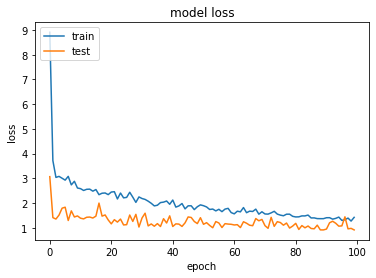

In [38]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
em=['happy','sad','neutral','angry']

In [40]:
classes_x = model.predict(x_testcnn)
predictions=np.argmax(classes_x,axis=1)

loss, acc = model.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 4ms/step - loss: 0.9140 - accuracy: 0.5630
Restored model, accuracy: 56.30%


In [41]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

         0.0       0.45      0.72      0.55        32
         1.0       0.54      0.43      0.48        35
         3.0       0.51      0.69      0.59        26
         4.0       0.95      0.48      0.63        42

    accuracy                           0.56       135
   macro avg       0.61      0.58      0.56       135
weighted avg       0.64      0.56      0.57       135



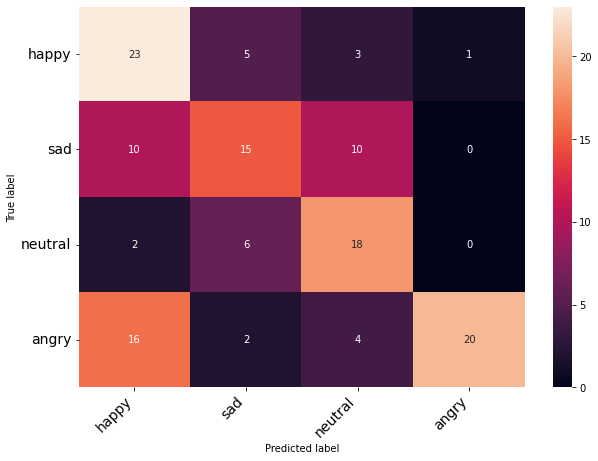

In [42]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

classes_x = model.predict(x_testcnn)
predictions=np.argmax(classes_x,axis=1)
#predictions = model.predict_classes(x_testcnn)
print(classification_report(y_test,predictions))
print_confusion_matrix(confusion_matrix(y_test,predictions),em)

In [22]:
filename = "data/ravdess/Actor_02/03-01-01-01-02-01-02.wav"
    # record the file (start talking)
    #record_to_file(filename)
    # extract features and reshape it
features = np.array(extract_feature(filename, mfcc=True, chroma=True, mel=True).reshape(1, -1))
    # predict
f=np.expand_dims(features,axis=2)
classes_pred = model.predict(f)
result=np.argmax(classes_pred,axis=1)

#result = model.predict_classes(f)[0]
    # show the result 
print("result :",em[result[0]-1])

result : neutral


<ipython-input-2-2161fc353d88>:20: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


**Model 2: Relu Relu Softmax** 

In [43]:


um = Sequential()

um.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
um.add(Activation('relu'))
um.add(MaxPooling1D(pool_size=(8)))
um.add(Dropout(0.25))


um.add(Conv1D(128, 5,padding='same',))                  #2
um.add(Activation('relu'))
um.add(MaxPooling1D(pool_size=(8)))
um.add(Dropout(0.25))


um.add(Flatten())
um.add(Dense(8))                                        #4                      
um.add(Activation('softmax'))
opt =tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)



In [44]:
um.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 180, 128)          768       
                                                                 
 activation_11 (Activation)  (None, 180, 128)          0         
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 22, 128)          0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 22, 128)           0         
                                                                 
 conv1d_8 (Conv1D)           (None, 22, 128)           82048     
                                                                 
 activation_12 (Activation)  (None, 22, 128)           0         
                                                      

In [45]:
um.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [46]:
umhistory=um.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 2s 33ms/step - loss: 20.2544 - accuracy: 0.1985 - val_loss: 3.5211 - val_accuracy: 0.2667
Epoch 2/100
21/21 [==============================] - 0s 17ms/step - loss: 13.7075 - accuracy: 0.2357 - val_loss: 5.1984 - val_accuracy: 0.2667
Epoch 3/100
21/21 [==============================] - 1s 32ms/step - loss: 12.9976 - accuracy: 0.2630 - val_loss: 4.3328 - val_accuracy: 0.2963
Epoch 4/100
21/21 [==============================] - 1s 33ms/step - loss: 13.4034 - accuracy: 0.2655 - val_loss: 3.6891 - val_accuracy: 0.3111
Epoch 5/100
21/21 [==============================] - 1s 32ms/step - loss: 11.5994 - accuracy: 0.2705 - val_loss: 2.2979 - val_accuracy: 0.3333
Epoch 6/100
21/21 [==============================] - 1s 33ms/step - loss: 11.4664 - accuracy: 0.2630 - val_loss: 5.2827 - val_accuracy: 0.3111
Epoch 7/100
21/21 [==============================] - 1s 35ms/step - loss: 11.8121 - accuracy: 0.2754 - val_loss: 4.0204 - val_accuracy: 0.3259

21/21 [==============================] - 0s 24ms/step - loss: 2.7048 - accuracy: 0.3722 - val_loss: 1.2657 - val_accuracy: 0.4222
Epoch 59/100
21/21 [==============================] - 1s 27ms/step - loss: 2.6538 - accuracy: 0.3474 - val_loss: 1.2349 - val_accuracy: 0.4148
Epoch 60/100
21/21 [==============================] - 0s 22ms/step - loss: 2.4643 - accuracy: 0.3747 - val_loss: 1.1661 - val_accuracy: 0.4222
Epoch 61/100
21/21 [==============================] - 0s 20ms/step - loss: 2.3481 - accuracy: 0.3747 - val_loss: 1.1526 - val_accuracy: 0.4296
Epoch 62/100
21/21 [==============================] - 1s 25ms/step - loss: 2.3050 - accuracy: 0.4169 - val_loss: 1.1703 - val_accuracy: 0.4222
Epoch 63/100
21/21 [==============================] - 1s 26ms/step - loss: 2.2484 - accuracy: 0.3995 - val_loss: 1.1693 - val_accuracy: 0.4222
Epoch 64/100
21/21 [==============================] - 1s 25ms/step - loss: 2.2557 - accuracy: 0.3772 - val_loss: 1.1837 - val_accuracy: 0.4296
Epoch 65/100

In [47]:

loss, acc = um.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 6ms/step - loss: 1.1574 - accuracy: 0.4741
Restored model, accuracy: 47.41%


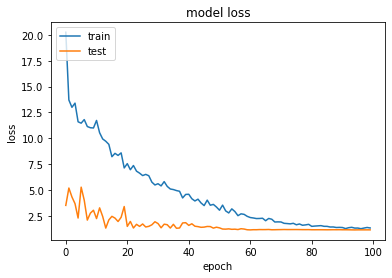

In [62]:
plt.plot(umhistory.history['loss'])
plt.plot(umhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

              precision    recall  f1-score   support

         0.0       0.45      0.72      0.55        32
         1.0       0.54      0.43      0.48        35
         3.0       0.51      0.69      0.59        26
         4.0       0.95      0.48      0.63        42

    accuracy                           0.56       135
   macro avg       0.61      0.58      0.56       135
weighted avg       0.64      0.56      0.57       135



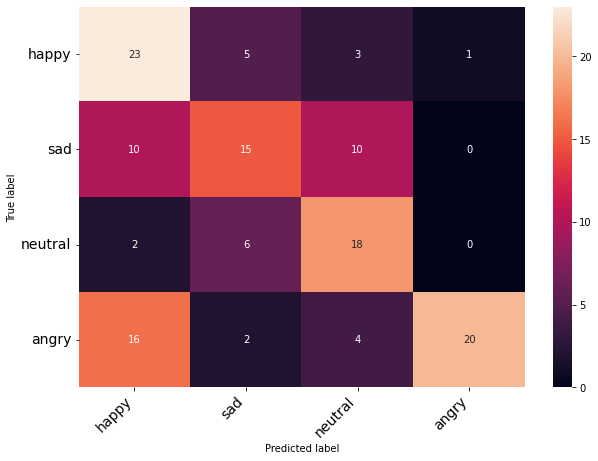

In [50]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
classes_pa = model.predict(x_testcnn)
prediction=np.argmax(classes_pa,axis=1)
#prediction = um.predict_classes(x_testcnn)
print(classification_report(y_test,prediction))
print_confusion_matrix(confusion_matrix(y_test,predictions),em)

**Model 3: Relu Relu Softmax**

In [57]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


tm = Sequential()

tm.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
tm.add(Activation('relu'))
tm.add(Dropout(0.1))
tm.add(MaxPooling1D(pool_size=(8)))

tm.add(Conv1D(128, 5,padding='same',))                  #2
tm.add(Activation('relu'))
tm.add(MaxPooling1D(pool_size=(8)))
tm.add(Dropout(0.1))

tm.add(Conv1D(128, 5,padding='same',))                  #3
tm.add(Activation('relu'))
tm.add(Dropout(0.1))

tm.add(Flatten())
tm.add(Dense(8))                                        #4                      
tm.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)



In [58]:
tm.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_22 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_15 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_23 (Activation)  (None, 22, 128)           0         
                                                      

In [59]:
tm.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [60]:
tmhistory=tm.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 3s 49ms/step - loss: 4.7350 - accuracy: 0.2407 - val_loss: 1.6178 - val_accuracy: 0.3407
Epoch 2/100
21/21 [==============================] - 1s 26ms/step - loss: 3.9258 - accuracy: 0.2804 - val_loss: 2.4372 - val_accuracy: 0.3111
Epoch 3/100
21/21 [==============================] - 1s 34ms/step - loss: 3.5278 - accuracy: 0.3052 - val_loss: 1.4711 - val_accuracy: 0.3185
Epoch 4/100
21/21 [==============================] - 1s 29ms/step - loss: 3.1434 - accuracy: 0.3350 - val_loss: 1.4645 - val_accuracy: 0.3704
Epoch 5/100
21/21 [==============================] - 1s 34ms/step - loss: 3.1368 - accuracy: 0.3151 - val_loss: 1.5073 - val_accuracy: 0.3630
Epoch 6/100
21/21 [==============================] - 1s 42ms/step - loss: 2.9374 - accuracy: 0.2730 - val_loss: 2.2553 - val_accuracy: 0.3630
Epoch 7/100
21/21 [==============================] - 1s 29ms/step - loss: 2.7130 - accuracy: 0.3052 - val_loss: 1.5599 - val_accuracy: 0.3852
Epoch 

21/21 [==============================] - 1s 28ms/step - loss: 1.1880 - accuracy: 0.4789 - val_loss: 1.0859 - val_accuracy: 0.4593
Epoch 59/100
21/21 [==============================] - 1s 28ms/step - loss: 1.1870 - accuracy: 0.4591 - val_loss: 1.1033 - val_accuracy: 0.4889
Epoch 60/100
21/21 [==============================] - 1s 29ms/step - loss: 1.2077 - accuracy: 0.4392 - val_loss: 1.0903 - val_accuracy: 0.4889
Epoch 61/100
21/21 [==============================] - 1s 32ms/step - loss: 1.2158 - accuracy: 0.4243 - val_loss: 1.0975 - val_accuracy: 0.4889
Epoch 62/100
21/21 [==============================] - 1s 30ms/step - loss: 1.1907 - accuracy: 0.4665 - val_loss: 1.0828 - val_accuracy: 0.4444
Epoch 63/100
21/21 [==============================] - 1s 28ms/step - loss: 1.2195 - accuracy: 0.4566 - val_loss: 1.0923 - val_accuracy: 0.4963
Epoch 64/100
21/21 [==============================] - 1s 27ms/step - loss: 1.2199 - accuracy: 0.4342 - val_loss: 1.0829 - val_accuracy: 0.4889
Epoch 65/100

In [61]:
loss, acc = tm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 12ms/step - loss: 1.0213 - accuracy: 0.5407
Restored model, accuracy: 54.07%


              precision    recall  f1-score   support

         0.0       0.45      0.72      0.55        32
         1.0       0.54      0.43      0.48        35
         3.0       0.51      0.69      0.59        26
         4.0       0.95      0.48      0.63        42

    accuracy                           0.56       135
   macro avg       0.61      0.58      0.56       135
weighted avg       0.64      0.56      0.57       135



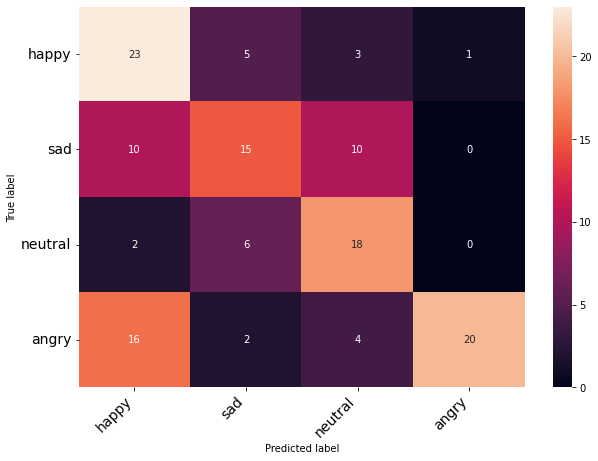

In [64]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
classes_tp = model.predict(x_testcnn)
predict=np.argmax(classes_tp,axis=1)
#predict = tm.predict_classes(x_testcnn)
print(classification_report(y_test,predict))
print_confusion_matrix(confusion_matrix(y_test,predict),em)

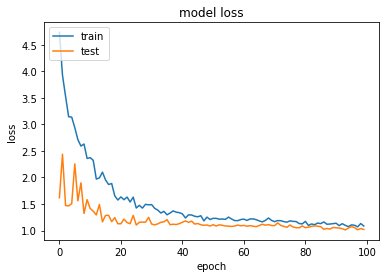

In [65]:
plt.plot(tmhistory.history['loss'])
plt.plot(tmhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 4: 4 Relu and 1 Softmax for flattening layer**

In [67]:


sm = Sequential()

sm.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm.add(Activation('relu'))
sm.add(Dropout(0.1))
sm.add(MaxPooling1D(pool_size=(8)))


sm.add(Conv1D(128, 5,padding='same',))                  #3
sm.add(Activation('relu'))
sm.add(Dropout(0.1))

sm.add(Conv1D(128, 5,padding='same',))                  #4
sm.add(Activation('relu'))
sm.add(Dropout(0.1))

sm.add(Conv1D(128, 5,padding='same',))                  #4
sm.add(Activation('relu'))
sm.add(Dropout(0.1))

sm.add(Flatten())
sm.add(Dense(8))                                        #5                     
sm.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)


In [68]:
sm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_31 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_22 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_23 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_32 (Activation)  (None, 22, 128)           0         
                                                      

In [69]:
sm.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [70]:
smhistory=sm.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 3s 72ms/step - loss: 2.4760 - accuracy: 0.2457 - val_loss: 1.6947 - val_accuracy: 0.2444
Epoch 2/100
21/21 [==============================] - 1s 41ms/step - loss: 1.9280 - accuracy: 0.3052 - val_loss: 1.9570 - val_accuracy: 0.2963
Epoch 3/100
21/21 [==============================] - 1s 40ms/step - loss: 1.8367 - accuracy: 0.3077 - val_loss: 1.5019 - val_accuracy: 0.3111
Epoch 4/100
21/21 [==============================] - 1s 46ms/step - loss: 1.8008 - accuracy: 0.3275 - val_loss: 1.3865 - val_accuracy: 0.3111
Epoch 5/100
21/21 [==============================] - 1s 41ms/step - loss: 1.6712 - accuracy: 0.3176 - val_loss: 1.7206 - val_accuracy: 0.3556
Epoch 6/100
21/21 [==============================] - 1s 47ms/step - loss: 1.6700 - accuracy: 0.3474 - val_loss: 1.3077 - val_accuracy: 0.3556
Epoch 7/100
21/21 [==============================] - 1s 38ms/step - loss: 1.6139 - accuracy: 0.3573 - val_loss: 1.3056 - val_accuracy: 0.3704
Epoch 

21/21 [==============================] - 1s 38ms/step - loss: 1.0603 - accuracy: 0.4938 - val_loss: 1.0291 - val_accuracy: 0.5037
Epoch 59/100
21/21 [==============================] - 1s 38ms/step - loss: 1.0569 - accuracy: 0.5012 - val_loss: 1.0325 - val_accuracy: 0.5259
Epoch 60/100
21/21 [==============================] - 1s 38ms/step - loss: 1.0349 - accuracy: 0.5509 - val_loss: 1.0191 - val_accuracy: 0.5111
Epoch 61/100
21/21 [==============================] - 1s 71ms/step - loss: 1.0269 - accuracy: 0.5236 - val_loss: 1.0138 - val_accuracy: 0.5333
Epoch 62/100
21/21 [==============================] - 1s 71ms/step - loss: 1.0500 - accuracy: 0.5236 - val_loss: 1.0012 - val_accuracy: 0.5926
Epoch 63/100
21/21 [==============================] - 1s 71ms/step - loss: 1.0443 - accuracy: 0.5310 - val_loss: 1.0103 - val_accuracy: 0.6000
Epoch 64/100
21/21 [==============================] - 1s 70ms/step - loss: 1.0534 - accuracy: 0.5211 - val_loss: 1.0003 - val_accuracy: 0.6000
Epoch 65/100

              precision    recall  f1-score   support

         0.0       0.45      0.72      0.55        32
         1.0       0.54      0.43      0.48        35
         3.0       0.51      0.69      0.59        26
         4.0       0.95      0.48      0.63        42

    accuracy                           0.56       135
   macro avg       0.61      0.58      0.56       135
weighted avg       0.64      0.56      0.57       135



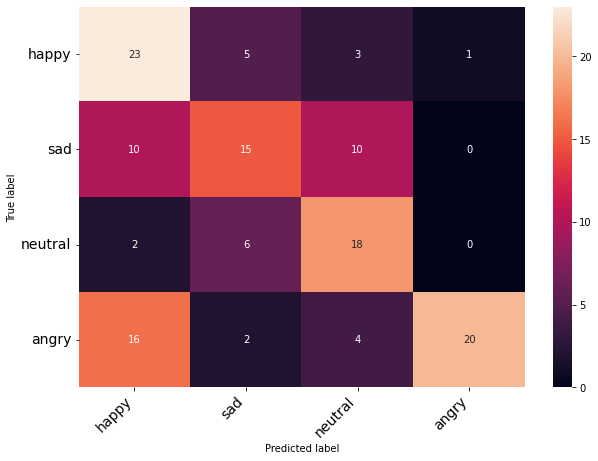

In [71]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
classes_x = model.predict(x_testcnn)
p=np.argmax(classes_x,axis=1)

#p = sm.predict_classes(x_testcnn)
print(classification_report(y_test,p))
print_confusion_matrix(confusion_matrix(y_test,p),em)

In [72]:
loss, acc = sm.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 12ms/step - loss: 0.9626 - accuracy: 0.5852
Restored model, accuracy: 58.52%


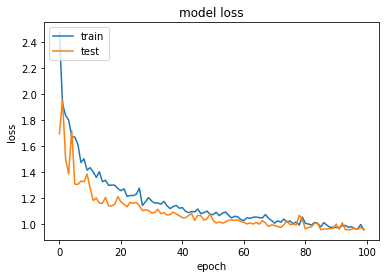

In [73]:
plt.plot(smhistory.history['loss'])
plt.plot(smhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 4: 5 relu and 1 SOftmax **

In [75]:


sm4 = Sequential()

sm4.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm4.add(Activation('relu'))
sm4.add(Dropout(0.1))
sm4.add(MaxPooling1D(pool_size=(8)))


sm4.add(Conv1D(128, 5,padding='same',))                  #3
sm4.add(Activation('relu'))
sm4.add(Dropout(0.1))

sm4.add(Conv1D(128, 5,padding='same',))                  #3
sm4.add(Activation('relu'))
sm4.add(Dropout(0.1))

sm4.add(Conv1D(128, 5,padding='same',))                  #3
sm4.add(Activation('relu'))
sm4.add(Dropout(0.1))

sm4.add(Conv1D(128, 5,padding='same',))                  #4
sm4.add(Activation('softmax'))
sm4.add(Dropout(0.1))

sm4.add(Flatten())
sm4.add(Dense(8))                                        #5                     
sm4.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)


In [76]:
sm4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_30 (Conv1D)          (None, 180, 128)          768       
                                                                 
 activation_41 (Activation)  (None, 180, 128)          0         
                                                                 
 dropout_30 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_31 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_42 (Activation)  (None, 22, 128)           0         
                                                     

In [77]:
sm4.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [78]:
sm4history=sm4.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Epoch 1/100
21/21 [==============================] - 4s 74ms/step - loss: 2.0271 - accuracy: 0.2556 - val_loss: 1.9764 - val_accuracy: 0.3111
Epoch 2/100
21/21 [==============================] - 1s 42ms/step - loss: 1.9639 - accuracy: 0.2829 - val_loss: 1.9394 - val_accuracy: 0.3111
Epoch 3/100
21/21 [==============================] - 1s 53ms/step - loss: 1.9235 - accuracy: 0.2779 - val_loss: 1.9011 - val_accuracy: 0.3407
Epoch 4/100
21/21 [==============================] - 1s 50ms/step - loss: 1.8906 - accuracy: 0.3077 - val_loss: 1.8786 - val_accuracy: 0.3407
Epoch 5/100
21/21 [==============================] - 1s 42ms/step - loss: 1.8663 - accuracy: 0.3027 - val_loss: 1.8587 - val_accuracy: 0.2815
Epoch 6/100
21/21 [==============================] - 1s 44ms/step - loss: 1.8397 - accuracy: 0.3151 - val_loss: 1.8325 - val_accuracy: 0.3481
Epoch 7/100
21/21 [==============================] - 1s 42ms/step - loss: 1.8208 - accuracy: 0.3102 - val_loss: 1.8161 - val_accuracy: 0.3333
Epoch 

21/21 [==============================] - 1s 42ms/step - loss: 1.3418 - accuracy: 0.4442 - val_loss: 1.3661 - val_accuracy: 0.4444
Epoch 59/100
21/21 [==============================] - 1s 46ms/step - loss: 1.3309 - accuracy: 0.4789 - val_loss: 1.3580 - val_accuracy: 0.4519
Epoch 60/100
21/21 [==============================] - 1s 46ms/step - loss: 1.3255 - accuracy: 0.4764 - val_loss: 1.3550 - val_accuracy: 0.4296
Epoch 61/100
21/21 [==============================] - 1s 42ms/step - loss: 1.3279 - accuracy: 0.4491 - val_loss: 1.3505 - val_accuracy: 0.4444
Epoch 62/100
21/21 [==============================] - 1s 47ms/step - loss: 1.3219 - accuracy: 0.4665 - val_loss: 1.3462 - val_accuracy: 0.4444
Epoch 63/100
21/21 [==============================] - 1s 65ms/step - loss: 1.3109 - accuracy: 0.4814 - val_loss: 1.3418 - val_accuracy: 0.4444
Epoch 64/100
21/21 [==============================] - 1s 56ms/step - loss: 1.3051 - accuracy: 0.4764 - val_loss: 1.3381 - val_accuracy: 0.4296
Epoch 65/100

In [125]:
loss, acc = sm4.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

5/5 [==============================] - 0s 14ms/step - loss: 1.0441 - accuracy: 0.4815
Restored model, accuracy: 48.15%


In [ ]:
plt.plot(sm4history.history['loss'])
plt.plot(sm4history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model 4: 2 sigmoid and 2 softmax**

In [80]:

sm5 = Sequential()

sm5.add(Conv1D(128, 5,padding='same',input_shape=(180,1)))#1
sm4.add(Activation('sigmoid'))
sm5.add(Dropout(0.1))
sm5.add(MaxPooling1D(pool_size=(8)))


sm5.add(Conv1D(128, 5,padding='same',))                  #2
sm5.add(Activation('sigmoid'))
sm5.add(Dropout(0.1))

sm5.add(Conv1D(128, 5,padding='same',))                  #3
sm5.add(Activation('relu'))
sm5.add(Dropout(0.1))

sm5.add(Flatten())
sm5.add(Dense(8))                                        #4                    
sm5.add(Activation('relu'))
opt = tf.keras.optimizers.RMSprop(learning_rate=0.00005,epsilon=None,rho=0.9,decay=0.0)

sm5.summary()


sm5.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

sm5history=sm5.fit(x_traincnn, y_train, batch_size=20, epochs=100, validation_data=(x_testcnn, y_test))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_35 (Conv1D)          (None, 180, 128)          768       
                                                                 
 dropout_35 (Dropout)        (None, 180, 128)          0         
                                                                 
 max_pooling1d_18 (MaxPoolin  (None, 22, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_36 (Conv1D)          (None, 22, 128)           82048     
                                                                 
 activation_48 (Activation)  (None, 22, 128)           0         
                                                                 
 dropout_36 (Dropout)        (None, 22, 128)           0         
                                                     

Epoch 44/100
21/21 [==============================] - 1s 29ms/step - loss: 1.2940 - accuracy: 0.3945 - val_loss: 1.2136 - val_accuracy: 0.2370
Epoch 45/100
21/21 [==============================] - 1s 30ms/step - loss: 1.2361 - accuracy: 0.3300 - val_loss: 1.2103 - val_accuracy: 0.2370
Epoch 46/100
21/21 [==============================] - 1s 30ms/step - loss: 1.2355 - accuracy: 0.3672 - val_loss: 1.2141 - val_accuracy: 0.3259
Epoch 47/100
21/21 [==============================] - 1s 37ms/step - loss: 1.2434 - accuracy: 0.3474 - val_loss: 1.2219 - val_accuracy: 0.3111
Epoch 48/100
21/21 [==============================] - 1s 57ms/step - loss: 1.2041 - accuracy: 0.3573 - val_loss: 1.2094 - val_accuracy: 0.3111
Epoch 49/100
21/21 [==============================] - 1s 57ms/step - loss: 1.3222 - accuracy: 0.3499 - val_loss: 1.1917 - val_accuracy: 0.3259
Epoch 50/100
21/21 [==============================] - 1s 40ms/step - loss: 1.2061 - accuracy: 0.4020 - val_loss: 1.2274 - val_accuracy: 0.3778

5/5 [==============================] - 0s 10ms/step - loss: 1.1089 - accuracy: 0.4667
Restored model, accuracy: 46.67%


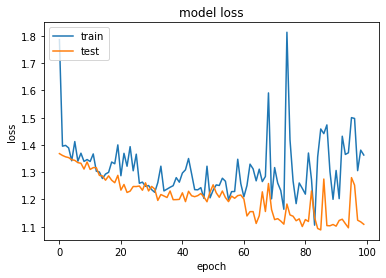

In [81]:
loss, acc = sm5.evaluate(x_testcnn, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

plt.plot(sm5history.history['loss'])
plt.plot(sm5history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()